<a href="https://colab.research.google.com/github/saguileran/MD-SCPI/blob/main/NoteBooks/MC_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#@title Github

!rm -r /content/MD-SCPI
!git clone https://github.com/saguileran/MD-SCPI


Cloning into 'MD-SCPI'...
remote: Enumerating objects: 1267, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 1267 (delta 134), reused 186 (delta 61), pack-reused 971
Receiving objects: 100% (1267/1267), 193.42 MiB | 25.09 MiB/s, done.
Resolving deltas: 100% (547/547), done.
Updating files: 100% (247/247), done.


In [93]:
import sys
!{sys.executable} -m pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.3 MB/s eta 0:00:00


In [73]:
!ls "MD-SCPI/PDBs/MC/AS4/300K"

MR-AS4_10_MR-AS4.inpcrd_mc.dat.gz  MR-AS4_5_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_6_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_2_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_7_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_3_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_8_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_4_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_9_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_10_MR-AS4.inpcrd_mc.dat.gz  MR-AS4_5_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_6_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_2_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_7_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_3_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_8_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_4_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_9_MR-AS4.inpcrd_mc.dat.gz


In [230]:
#import gzip
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from google.colab import output
import numpy as np
import matplotlib as mpl

def ReadGz(path):
  #data = pd.read_csv(path, compression='gzip',  header=4, delimiter="  ")[['#', 'Step', 'Unnamed: 6', 'Unnamed: 7', ' RMSD']].rename({'#':'Step', 'Step':'Energy', 'Unnamed: 6':'RMSD', 'Unnamed: 7':'DX', ' RMSD':'DY'}, axis=1)
  file1 = gzip.open(path)
  a = file1.read()

  array, c = [], 0
  text = str(a).split()[11:]
  head = text[:14] # 20 

  for i in range(20,len(text)):
    c += 1
    if '\\n' in text[i]:
      text[i] = text[i].replace("\\n","")
      text[i] = text[i].replace("'","")
      words = [float(word) for word in text[i-c+1:i+1]]
      array.append(words) #text[i-c+1:i+1])
      c = 0

  array = np.array(array)
  data = pd.DataFrame({head[i]:array[:,i] for i in range(len(head))})
  return data

#file1 = gzip.open('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')
%matplotlib ipympl
output.enable_custom_widget_manager()

In [231]:
#file1 = gzip.open('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')
#ReadGz('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')['Step']

In [232]:
temperatures = ['300K', '600K', '1200K', '2400K', '4800K', '9600K']
path = 'MD-SCPI/PDBs/MC/AS4/' #300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz'
gz_files = [f for f in listdir(path+temperatures[0]) if isfile(join(path+temperatures[0], f))]

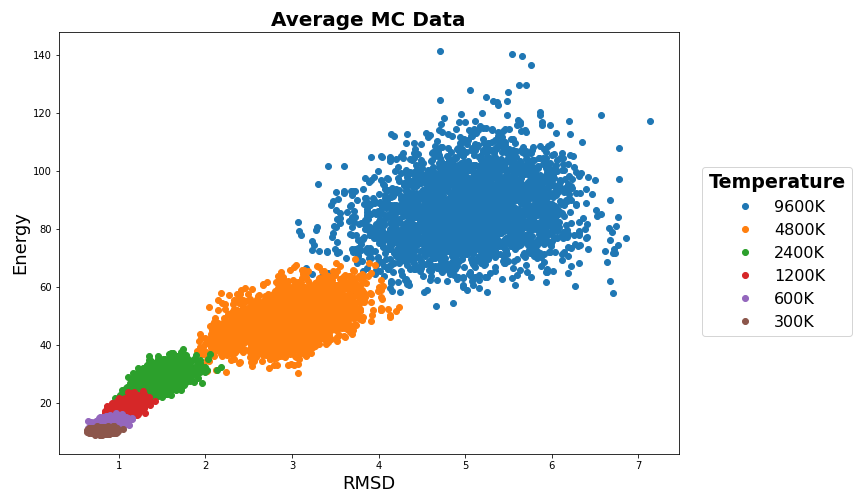

In [237]:
plt.close()
fig = plt.figure(figsize=(12,7))

for temp in list(reversed((temperatures))):
  rmsd, energy = [], []
  for file in gz_files:
    data = ReadGz(path+temp+'/'+file)
    rmsd.append(data['RMSD']); energy.append(data['Energy'])
  #plt.plot(data['RMSD'], data['Energy'], 'o', label=temp)
  rmsd = np.average(np.array(rmsd), axis=0); energy = np.average(np.array(energy), axis=0)
  plt.plot(rmsd, energy, 'o', label=temp)

plt.xlabel('RMSD', fontsize='18'); plt.ylabel('Energy', fontsize='18')
#plt.ylim((0, 100)); plt.xlim((0, 10))
plt.legend(title='Temperature', bbox_to_anchor=(1.025, .7), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
plt.title('Average MC Data', fontsize='20', fontweight='bold')

fig.tight_layout()